In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import random

In [2]:
from platform import python_version

print(python_version())

3.7.3


In [2]:
fashion_dataset = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_dataset.load_data()

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [6]:
train_images.shape

(60000, 28, 28)

In [7]:
type(train_images)

numpy.ndarray

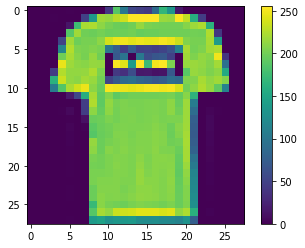

In [10]:
plt.figure()
plt.imshow(train_images[1])
plt.colorbar()
plt.show()

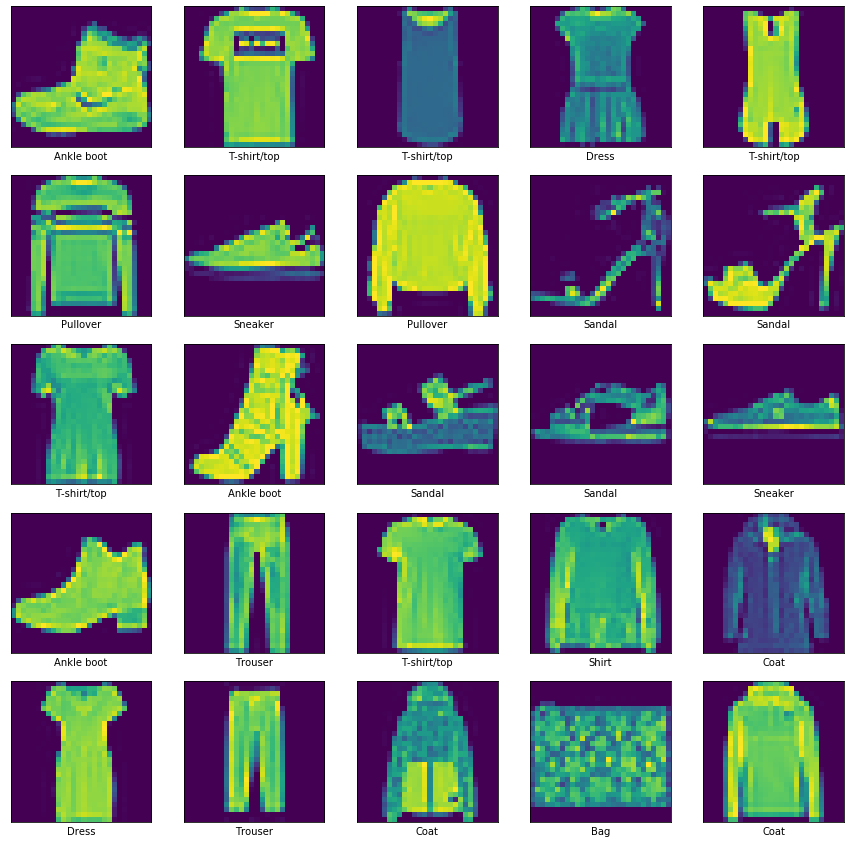

In [11]:
plt.figure(figsize=(15,15))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    plt.xlabel(class_names[train_labels[i]])
plt.show()

# Dense neural network

In [5]:
sequential_board = keras.callbacks.TensorBoard(log_dir="logs/sequential", histogram_freq=10)

In [6]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

W0730 22:06:20.377220 139825680987968 deprecation.py:506] From /root/anaconda3/envs/tf/lib/python3.7/site-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [7]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [8]:
model.fit(train_images, train_labels, epochs=10, batch_size=100, callbacks=[sequential_board], validation_split=0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 2s 50us/sample - loss: 6.5771 - acc: 0.6972 - val_loss: 1.0580 - val_acc: 0.6955
Epoch 2/10
48000/48000 [==============================] - 1s 26us/sample - loss: 0.8262 - acc: 0.7491 - val_loss: 0.7506 - val_acc: 0.7673
Epoch 3/10
48000/48000 [==============================] - 1s 25us/sample - loss: 0.6559 - acc: 0.7864 - val_loss: 0.6555 - val_acc: 0.7975
Epoch 4/10
48000/48000 [==============================] - 1s 25us/sample - loss: 0.5720 - acc: 0.8062 - val_loss: 0.6099 - val_acc: 0.8028
Epoch 5/10
48000/48000 [==============================] - 1s 24us/sample - loss: 0.5254 - acc: 0.8198 - val_loss: 0.5768 - val_acc: 0.8206
Epoch 6/10
48000/48000 [==============================] - 1s 25us/sample - loss: 0.5059 - acc: 0.8227 - val_loss: 0.5287 - val_acc: 0.8258
Epoch 7/10
48000/48000 [==============================] - 1s 25us/sample - loss: 0.4753 - acc: 0.8333 - val_loss: 0.

In [9]:
model.evaluate(test_images, test_labels, callbacks=[sequential_board])

10000/10000 [==============================] - 0s 38us/sample - loss: 0.5480 - acc: 0.8179


[0.5479892378807067, 0.8179]

# CNN

In [3]:
input_shape = (28, 28,1)
print(input_shape)

(28, 28, 1)


## CNN simple(1 convo 1 pool)

In [9]:
cnn1_board = keras.callbacks.TensorBoard(log_dir="logs/cnn1", histogram_freq=10)

In [10]:
cnn_model = keras.Sequential([
    keras.layers.Conv2D(filters=8, kernel_size=(3,3), input_shape=input_shape, name='convo1'),
    keras.layers.MaxPooling2D(pool_size=(2, 2), strides=None, padding='valid', name='pool1'),
    keras.layers.Flatten(),
    keras.layers.Dense(10, activation='softmax', name='activation')
])

W0730 22:28:18.589083 139794923976512 deprecation.py:506] From /root/anaconda3/envs/tf/lib/python3.7/site-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [11]:
cnn_model.compile(optimizer="adam",
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

In [12]:
cnn_model.fit(train_images.reshape(-1, 28, 28, 1), 
              train_labels,
              epochs=10,
              callbacks=[cnn1_board],
              validation_split=0.2,
              batch_size=100
             )

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 9s 185us/sample - loss: 6.5372 - acc: 0.7615 - val_loss: 3.0913 - val_acc: 0.7820
Epoch 2/10
48000/48000 [==============================] - 4s 78us/sample - loss: 1.9701 - acc: 0.8244 - val_loss: 1.6860 - val_acc: 0.8286
Epoch 3/10
48000/48000 [==============================] - 4s 74us/sample - loss: 1.2127 - acc: 0.8428 - val_loss: 1.1444 - val_acc: 0.8413
Epoch 4/10
48000/48000 [==============================] - 4s 74us/sample - loss: 0.8337 - acc: 0.8542 - val_loss: 0.9606 - val_acc: 0.8232
Epoch 5/10
48000/48000 [==============================] - 4s 74us/sample - loss: 0.6120 - acc: 0.8631 - val_loss: 0.7350 - val_acc: 0.8392
Epoch 6/10
48000/48000 [==============================] - 4s 75us/sample - loss: 0.4829 - acc: 0.8712 - val_loss: 0.6257 - val_acc: 0.8386
Epoch 7/10
48000/48000 [==============================] - 6s 126us/sample - loss: 0.3923 - acc: 0.8799 - val_loss: 

In [13]:
cnn_model.evaluate(test_images.reshape(-1, 28 , 28, 1), test_labels)

10000/10000 [==============================] - 1s 52us/sample - loss: 0.4351 - acc: 0.8610


[0.43507222294807435, 0.861]

## CNN 2 ( C-P-C-P)

In [4]:
cnn2_board = keras.callbacks.TensorBoard(log_dir="logs/cnn2", histogram_freq=10, batch_size=100)

In [5]:
cnn_model2 = keras.Sequential([
    keras.layers.Conv2D(filters=16, kernel_size=(3,3), input_shape=input_shape, name='convo1'),
    keras.layers.MaxPooling2D(pool_size=(2, 2), strides=None, padding='valid', name='pool1'),
    keras.layers.Conv2D(filters=4, kernel_size=(5,5), input_shape=input_shape, name='convo2'),
    keras.layers.MaxPooling2D(pool_size=(2, 2), strides=None, padding='valid', name='pool2'),
    keras.layers.Flatten(),
    keras.layers.Dense(10, activation='softmax', name='activation')
]) 

W0730 22:37:45.004366 140227443705664 deprecation.py:506] From /root/anaconda3/envs/tf/lib/python3.7/site-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [6]:
cnn_model2.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

In [7]:
cnn_model2.fit(train_images.reshape(-1, 28, 28, 1),
               train_labels,
               epochs=15,
               batch_size=100,
               callbacks=[cnn2_board],
               validation_split=0.2
              )

Train on 48000 samples, validate on 12000 samples
Epoch 1/15
48000/48000 [==============================] - 17s 359us/sample - loss: 5.3537 - acc: 0.5979 - val_loss: 2.0686 - val_acc: 0.6865
Epoch 2/15
48000/48000 [==============================] - 7s 145us/sample - loss: 1.4482 - acc: 0.7232 - val_loss: 1.1084 - val_acc: 0.7495
Epoch 3/15
48000/48000 [==============================] - 7s 144us/sample - loss: 0.9094 - acc: 0.7612 - val_loss: 0.8248 - val_acc: 0.7657
Epoch 4/15
48000/48000 [==============================] - 9s 197us/sample - loss: 0.7004 - acc: 0.7873 - val_loss: 0.6498 - val_acc: 0.7943
Epoch 5/15
48000/48000 [==============================] - 7s 143us/sample - loss: 0.5943 - acc: 0.8039 - val_loss: 0.5854 - val_acc: 0.8046
Epoch 6/15
48000/48000 [==============================] - 7s 143us/sample - loss: 0.5349 - acc: 0.8175 - val_loss: 0.5570 - val_acc: 0.8122
Epoch 7/15
48000/48000 [==============================] - 7s 143us/sample - loss: 0.5003 - acc: 0.8275 - val_

In [8]:
cnn_model2.evaluate(test_images.reshape(-1, 28 , 28, 1), test_labels)

10000/10000 [==============================] - 1s 85us/sample - loss: 0.4379 - acc: 0.8475


[0.4378585939884186, 0.8475]

# Using tensorflow

### Data preprocessing

In [113]:
def encode(labels, cat_count=10):
    """label is a list"""
    one_hot = np.zeros((labels.shape[0], cat_count))
    for i in range(labels.shape[0]):
        one_hot[i][labels[i]] = 1    
    print(one_hot.shape)
    return one_hot

train_labels_p =encode(train_labels)
train_images_p = np.reshape(train_images,(-1,28,28,1))
print(train_images_p.shape, train_labels_p.shape)

(60000, 10)
(60000, 28, 28, 1) (60000, 10)


### Helper functions

In [9]:
sequential_boarddef variable_summaries(var, name):
  """Attach a lot of summaries to a Tensor (for TensorBoard visualization)."""
  with tf.name_scope(name+'_summaries'):
    mean = tf.reduce_mean(var)
    tf.summary.scalar('mean', mean)
    with tf.name_scope('stddev'):
      stddev = tf.sqrt(tf.reduce_mean(tf.square(var - mean)))
    tf.summary.scalar('stddev', stddev)
    tf.summary.scalar('max', tf.reduce_max(var))
    tf.summary.scalar('min', tf.reduce_min(var))
    tf.summary.histogram('histogram', var)


In [10]:
def init_variable(shape,name, dtype=tf.float32):
    return tf.Variable(tf.random_normal(shape,dtype=dtype), name=name)

In [11]:
def convo(input_layer, filter_shape, strides=(1,2,2,1), padding="SAME", name="convo"):
    kernel = init_variable(filter_shape, name=name+"_kernel")
    variable_summaries(kernel, name+"_kernel")
    return tf.nn.conv2d(input=input_layer, filter= kernel, strides=strides, padding=padding, name=name)

In [12]:
def pool(input_layer,window_shape, stride=(1,2,2,1), padding="VALID"):
    return tf.nn.pool(input= input_layer, window_shape=window_shape, strides=stride, padding=padding, pooling_type="MAX")

In [13]:
def dense(input_layer, outputs= 10):
    input_shape = input_layer.get_shape().as_list()[-1]
    w = init_variable(shape=[input_shape, outputs], name="dense_wt")
    b = init_variable(shape=[outputs], name="dense_bias")
    variable_summaries(w, "dense_wt")
    variable_summaries(b, "dense_bias")
    out = keras.activations.softmax(tf.matmul(input_layer,w)+b)
    #print("dense output",out.shape)
    return out    

In [200]:
def calculate_accuracy(y_pred, y_true):
    pred = np.argmax(y_pred, axis=1)
    match_count = 0 
    for i, j in zip(pred, y_true):
        if i == j:
            match_count += 1
    acc = match_count/len(y_true)
    return acc

In [208]:
tf.reset_default_graph()

X_train = tf.placeholder(tf.float32, shape=[None,28,28,1], name="X_train") # train images

Y_train = tf.placeholder(tf.int64, shape=(None), name="Y_train") #train label one hot encoded

convo1 = convo(X_train, filter_shape=(3,3,1,16), strides=(1,1,1,1), name="convo1")
print(convo1.get_shape())

pool1 = pool(convo1, window_shape=(2,2), stride=(2,2))
print(pool1.get_shape())

convo2 = convo(pool1, filter_shape=(5,5,16, 4),strides=(1,1,1,1), name="convo2")

pool2 = pool(convo2, window_shape=(2,2), stride=(2,2))
print(pool2.get_shape())

flatten = tf.reshape(pool2, [-1, 7*7*4])
Y_pred = dense(flatten)
print(Y_pred)

(?, 28, 28, 16)
(?, 14, 14, 16)
(?, 7, 7, 4)
Tensor("Softmax:0", shape=(?, 10), dtype=float32)


In [209]:
# loss and optimization
loss = keras.losses.sparse_categorical_crossentropy(y_true=Y_train, y_pred=Y_pred)
optimizer = tf.train.AdamOptimizer()# keras.optimizers.Adam()
z = optimizer.minimize(loss)

In [210]:
# accuracy
print(Y_pred, Y_train)
correct = tf.equal(tf.math.argmax(Y_pred, axis=1), Y_train, "correct")
accuracy = tf.reduce_mean(tf.cast(correct, tf.float32), name="accuracy")
variable_summaries(accuracy, "accuracy")
tf.summary.scalar("accuracy", accuracy)
print(accuracy.shape)

Tensor("Softmax:0", shape=(?, 10), dtype=float32) Tensor("Y_train:0", dtype=int64)
()


In [211]:
print(train_images_p.shape, train_labels.shape)
print(type(train_images_p))

(60000, 28, 28, 1) (60000,)
<class 'numpy.ndarray'>


### Tensorboard setup

In [217]:
writer = tf.summary.FileWriter("logs/cnn_tf", tf.get_default_graph())
#loss_sumary = tf.summary.scalar("loss", loss)
merged = tf.summary.merge_all()

### Training

In [218]:
init = tf.global_variables_initializer()

In [219]:
batch_size = 30
test_size = 30
epochs = 5
with tf.Session() as sess:
    sess.run(init)
    writer.add_graph(sess.graph)
    for e in range(epochs):
        i = 0 # start index
        while i < len(train_images) - batch_size:
            x = train_images_p[i:i+batch_size,:,:,:]
            y = train_labels[i:i+batch_size]
            sess.run(z, feed_dict={X_train:x, Y_train:y})
            if i % 6000 == 0:
                summary = sess.run(merged, feed_dict={X_train:x, Y_train:y})
                writer.add_summary(summary,i//6000*(1+e))
                print(i//6000, end=" ")
            i += batch_size
        print()
        # calculate accuracy
        if e % 1 == 0:
            i = random.randint(0, len(train_images) - test_size)
            x = train_images_p[i:i+test_size,:,:,:]
            y = train_labels[i:i+test_size]
            y_pred, acc = sess.run([Y_pred, accuracy], feed_dict={X_train:x,Y_train:y})
            print("",np.argmax(y_pred, axis=1),"\n", y)
            print("at step::",e,"::accuracy=", calculate_accuracy(y_pred, y), acc)

0 1 2 3 4 5 6 7 8 9 
 [9 4 1 1 0 5 2 3 9 4 4 7 4 5 6 6 2 1 5 0 7 7 5 3 4 6 7 6 8 6] 
 [9 4 1 1 3 7 8 3 9 2 2 5 6 5 0 6 4 1 8 0 7 9 8 3 2 4 5 0 8 6]
at step:: 0 ::accuracy= 0.4666666666666667 0.46666667
0 1 2 3 4 5 6 7 8 9 
 [8 2 7 2 3 7 2 2 4 9 1 0 4 7 1 5 7 1 0 0 5 0 3 7 2 1 2 0 4 6] 
 [8 2 9 2 3 7 2 2 2 9 1 0 4 7 1 5 7 1 0 0 5 0 4 7 2 1 6 0 4 6]
at step:: 1 ::accuracy= 0.8666666666666667 0.8666667
0 1 2 3 4 5 6 7 8 9 
 [4 0 4 0 4 1 2 9 6 2 7 2 9 4 2 4 8 4 4 3 3 2 5 8 6 9 5 5 1 4] 
 [4 0 2 6 6 1 4 7 6 6 7 6 9 4 2 1 8 4 6 3 3 2 5 8 2 9 5 5 1 2]
at step:: 2 ::accuracy= 0.6333333333333333 0.6333333
0 1 2 3 4 5 6 7 8 9 
 [4 7 2 4 9 2 5 2 7 4 7 7 2 8 1 9 8 1 4 7 0 5 5 7 3 1 5 9 4 3] 
 [4 7 2 4 9 2 5 2 7 4 7 7 2 8 1 9 8 1 6 7 0 5 5 5 3 1 5 7 2 3]
at step:: 3 ::accuracy= 0.8666666666666667 0.8666667
0 1 2 3 4 5 6 7 8 9 
 [2 5 7 5 8 4 9 5 7 8 4 4 8 7 7 3 5 9 4 7 4 4 0 5 1 0 4 5 3 8] 
 [6 5 9 5 8 4 9 4 9 8 4 6 6 7 7 0 5 9 3 7 4 4 0 5 1 0 4 5 3 8]
at step:: 4 ::accuracy= 0.7333333333333333 0.73